# <font color = 'yellow'><b>Multiple Linear Regression</b></font>

##### In Multiple linear regression we are having more than one independent variable or features.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### <font color='dodgerblue'>Creating a random dataset</font>

In [2]:
rng = np.random.RandomState(12)

In [3]:
x1 = 100*rng.rand(1000)
x2 = 100*rng.rand(1000)
x3 = 100*rng.rand(1000)
x1.shape

(1000,)

In [10]:
y = rng.randint(20, 70, 1000)

In [11]:
y.shape, x1.shape, x2.shape

((1000,), (1000,), (1000,))

In [12]:
data = {"Feature 1": x1, "Feature 2": x2, "Feature 3": x3, "Target":y}

In [13]:
df = pd.DataFrame(data)

In [14]:
df

,Feature 1,Feature 2,Feature 3,Target
0,15.416284,69.191492,29.983219,46
1,74.004970,63.287830,85.381805,57
2,26.331502,58.106497,75.263715,45
3,53.373939,44.889259,22.365688,28
4,1.457496,65.873922,49.635241,31
...,...,...,...,...
995,66.495876,81.257253,63.800953,66
996,1.041179,77.925423,8.016184,31
997,86.826822,27.724679,66.111493,34
998,76.266046,51.283164,80.374447,42


In [15]:
df.isnull().sum()

Feature 1    0
Feature 2    0
Feature 3    0
Target       0
dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Feature 1  1000 non-null   float64
 1   Feature 2  1000 non-null   float64
 2   Feature 3  1000 non-null   float64
 3   Target     1000 non-null   int32  
dtypes: float64(3), int32(1)
memory usage: 27.5 KB


In [17]:
df.describe()

,Feature 1,Feature 2,Feature 3,Target
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,51.279170,48.989914,48.426521,44.843000
std,28.924101,29.050581,28.049811,14.599366
min,0.044462,0.111887,0.014441,20.000000
25%,26.538993,23.783083,24.268330,32.000000
50%,51.729551,48.677254,46.968465,44.000000
75%,76.764028,74.367130,72.293664,58.000000
max,99.974193,99.950850,99.831293,69.000000


In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [55]:
X = df.drop('Target', axis = 1)
y = df['Target']

In [56]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
lr = LinearRegression()

In [58]:
lr.fit(Xtrain, ytrain)

LinearRegression()

In [59]:
y_pred = lr.predict(Xtest)

In [60]:
mean_squared_error(ytest, y_pred)

211.15700793777359

In [25]:
y.shape, y_pred.shape

((1000,), (200,))

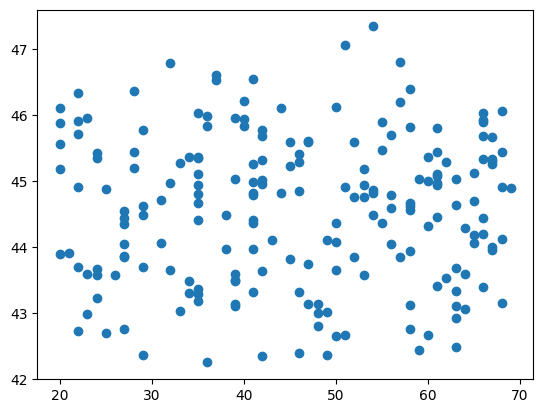

In [26]:
plt.scatter(ytest, y_pred)

## <font color = 'skyblue'><b>Ordinary Least Square (OLS) Method</b></font>

In [29]:
import statsmodels.api as sm

In [30]:
df.head()

,Feature 1,Feature 2,Feature 3,Target
0,15.416284,69.191492,29.983219,46
1,74.004970,63.287830,85.381805,57
2,26.331502,58.106497,75.263715,45
3,53.373939,44.889259,22.365688,28
4,1.457496,65.873922,49.635241,31


In [31]:
x_with_constant = sm.add_constant(Xtrain)
x_with_constant

,const,Feature 1,Feature 2,Feature 3
29,1.0,73.312598,68.996876,1.816124
535,1.0,90.451762,7.237399,52.295299
695,1.0,72.752602,65.356045,66.049834
557,1.0,7.422679,42.817360,13.123453
836,1.0,88.869970,53.795343,31.132650
...,...,...,...,...
106,1.0,80.073423,53.340316,82.675401
270,1.0,34.749418,13.409267,3.344853
860,1.0,19.092276,63.514188,86.624248
435,1.0,78.781750,35.464172,88.900277


In [32]:
model = sm.OLS(ytrain, x_with_constant)

In [33]:
result = model.fit()

In [34]:
lr.coef_

array([0.00073361, 0.02468603, 0.03140481])

In [35]:
lr.intercept_

41.839695412846

In [36]:
result.params

const        41.839695
Feature 1     0.000734
Feature 2     0.024686
Feature 3     0.031405
dtype: float64

In [38]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 Target   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.673
Date:                Fri, 03 May 2024   Prob (F-statistic):              0.171
Time:                        16:50:24   Log-Likelihood:                -3278.4
No. Observations:                 800   AIC:                             6565.
Df Residuals:                     796   BIC:                             6583.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.8397      1.605     26.069      0.0

In [40]:
x = df.drop(['Feature 1', 'Target'], axis = 1)
y2 = df['Target']

In [41]:
x2train, x2test, y2train, y2test = train_test_split(x, y2)

In [42]:
lr2 = LinearRegression()
lr2

LinearRegression()

In [43]:
lr2.fit(x2train, y2train)

LinearRegression()

In [44]:
y2_pred = lr2.predict(x2test)

In [45]:
mean_squared_error(y2test, y2_pred)

227.8436765792371

In [47]:
x_with = sm.add_constant(x2train)

In [48]:
x_with.head()

,const,Feature 2,Feature 3
36,1.0,51.951048,45.106879
900,1.0,1.059440,3.076803
824,1.0,38.898426,15.781736
417,1.0,18.825506,99.573145
866,1.0,26.000903,79.711043


In [50]:
model2 = sm.OLS(y2train, x_with)

In [51]:
result2 = model2.fit()

In [54]:
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Target   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     2.956
Date:                Fri, 03 May 2024   Prob (F-statistic):             0.0527
Time:                        16:56:58   Log-Likelihood:                -3063.6
No. Observations:                 750   AIC:                             6133.
Df Residuals:                     747   BIC:                             6147.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.8976      1.374     30.487      0.0